# Avocado Project

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Date - The date of the observation, 
AveragePrice - the average price of a single avocado, 
type - conventional or organic, 
year - the year, 
Region - the city or region of the observation, 
Total Volume - Total number of avocados sold, 
4046 - Total number of avocados with PLU 4046 sold, 
4225 - Total number of avocados with PLU 4225 sold, 
4770 - Total number of avocados with PLU 4770 sold, 


Data Collection and Preprocessing

In [1]:
# importing zipfile
import zipfile

In [2]:
# Let's unzip the file.
unzip=zipfile.ZipFile('./Downloads/avocado.csv.zip')

In [3]:
#Importing necessary libraries.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv(unzip.open('avocado.csv'),engine='python')

In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Let's check the shape of the data.
data.shape

(18249, 14)

There are total 18249 Rows and 14 columns in dataset.

In [6]:
# Checking the data summary.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


There is only one column 'region' with object data type.

In [7]:
# Checking the column names.
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

Here the column Unnamed is irrelevent and we will remove this column.

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# Let's check the missing values in the dataset.
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here there isn't any missing/null value in the dataset.

In [11]:
# Let's check the unique values in the dataset.
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Almost all columns have unique values.

In [12]:
# Let's rename some column for better understanding.
data = data.rename(index=str, columns={"4046" : "Small", "4225" : "Large","4770" : "XLarge" })

In [13]:
# Let's check If column got renamed or not.
data.head(2)

,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [14]:
# Let's convert the date column for model prediction.
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

data.head()

,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:xlabel='AveragePrice'>

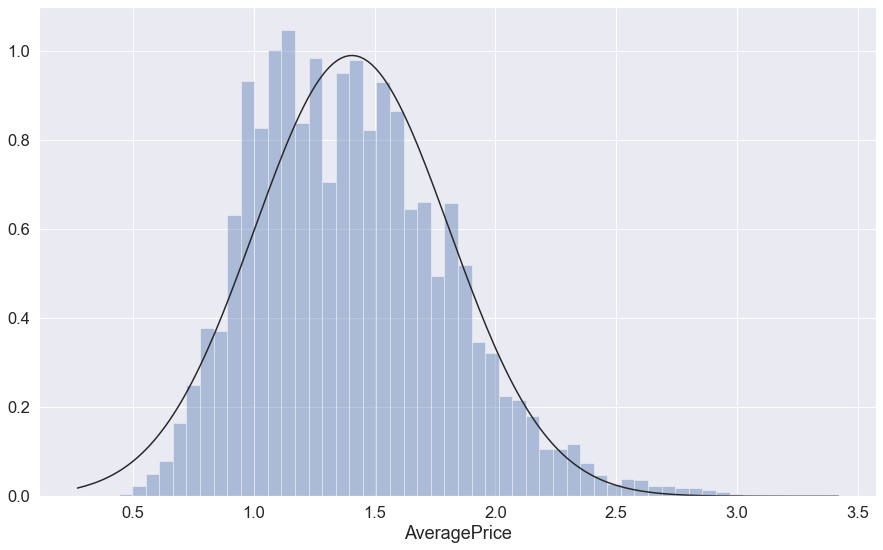

In [15]:
# Let's check the visualization of Average Price 
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=data.AveragePrice, kde=False, fit=norm)

Here the curve in the graph looks normal enough.

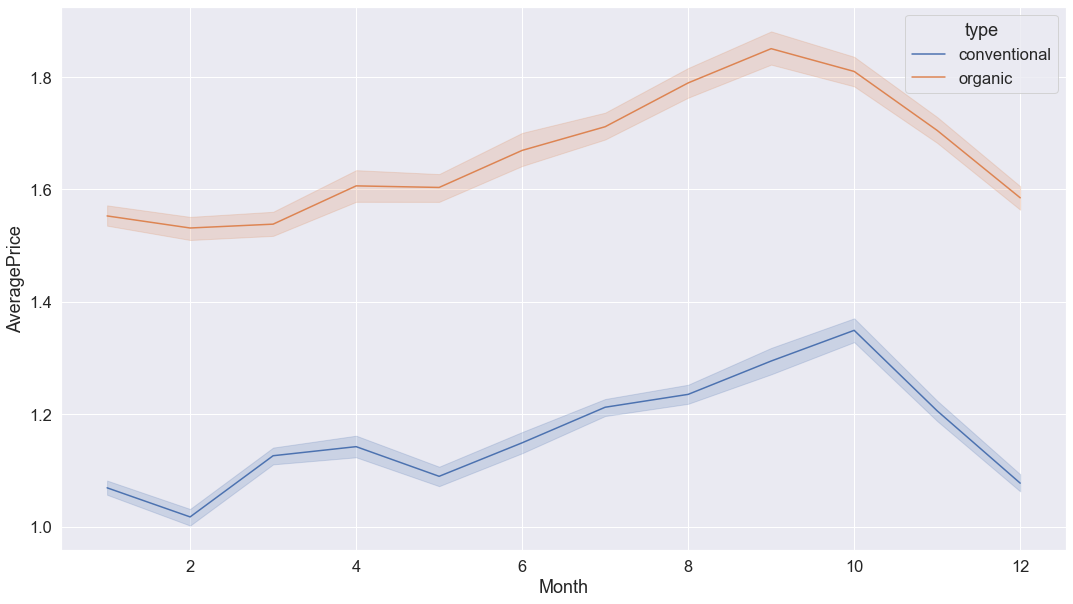

In [16]:
# Visualizing the Average Price of Avocado vs Month.

plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=data)
plt.show()

Here Prices showing peak in 9th and 10th month.

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

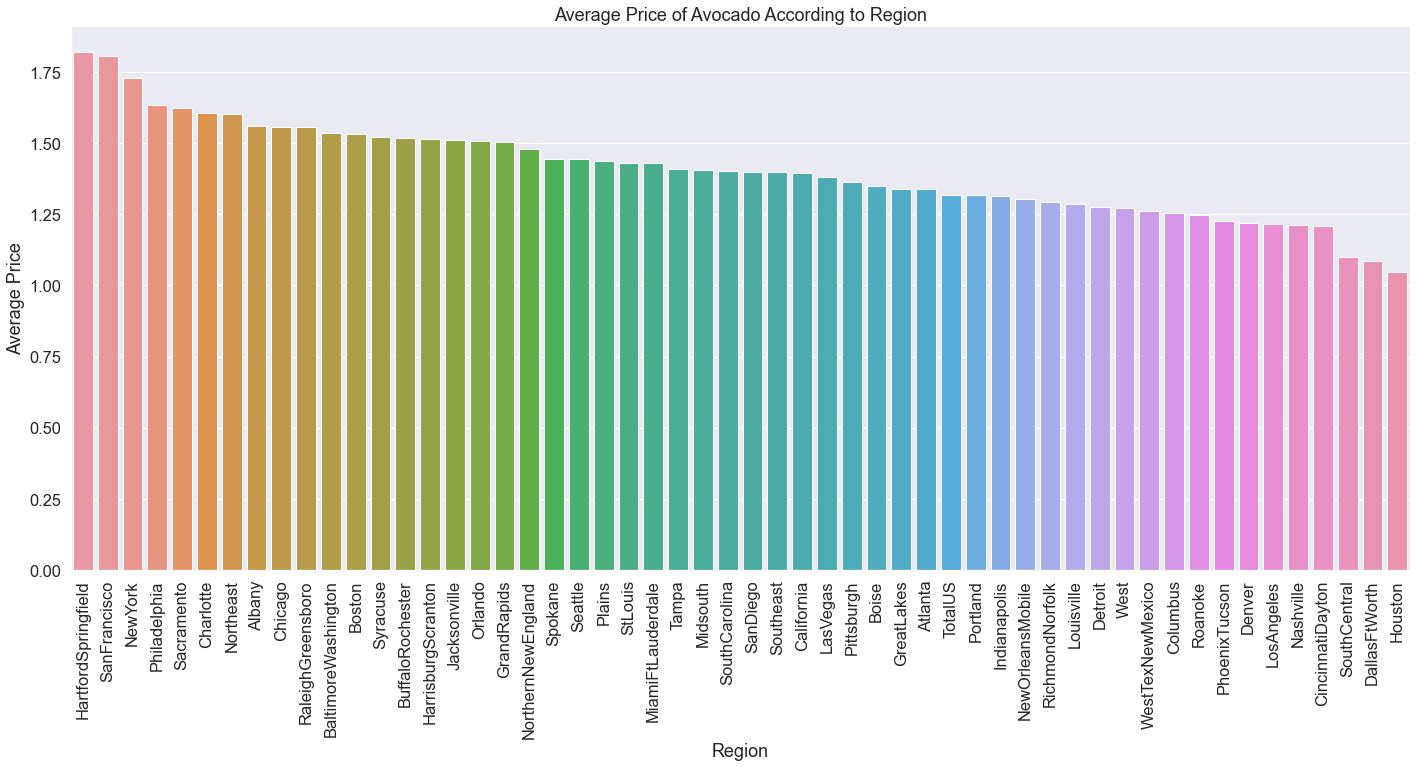

In [17]:
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

data1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=data1.average_price.sort_values(ascending=False).index.values
sorted_data=data1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Here Averege price is higher in regions,HalfSpringfield,SanFrancisco,NewYork,Philadelphia,Sacramento,Charlotte.

Text(0.5, 1.0, 'Average of Total Volume According to Region')

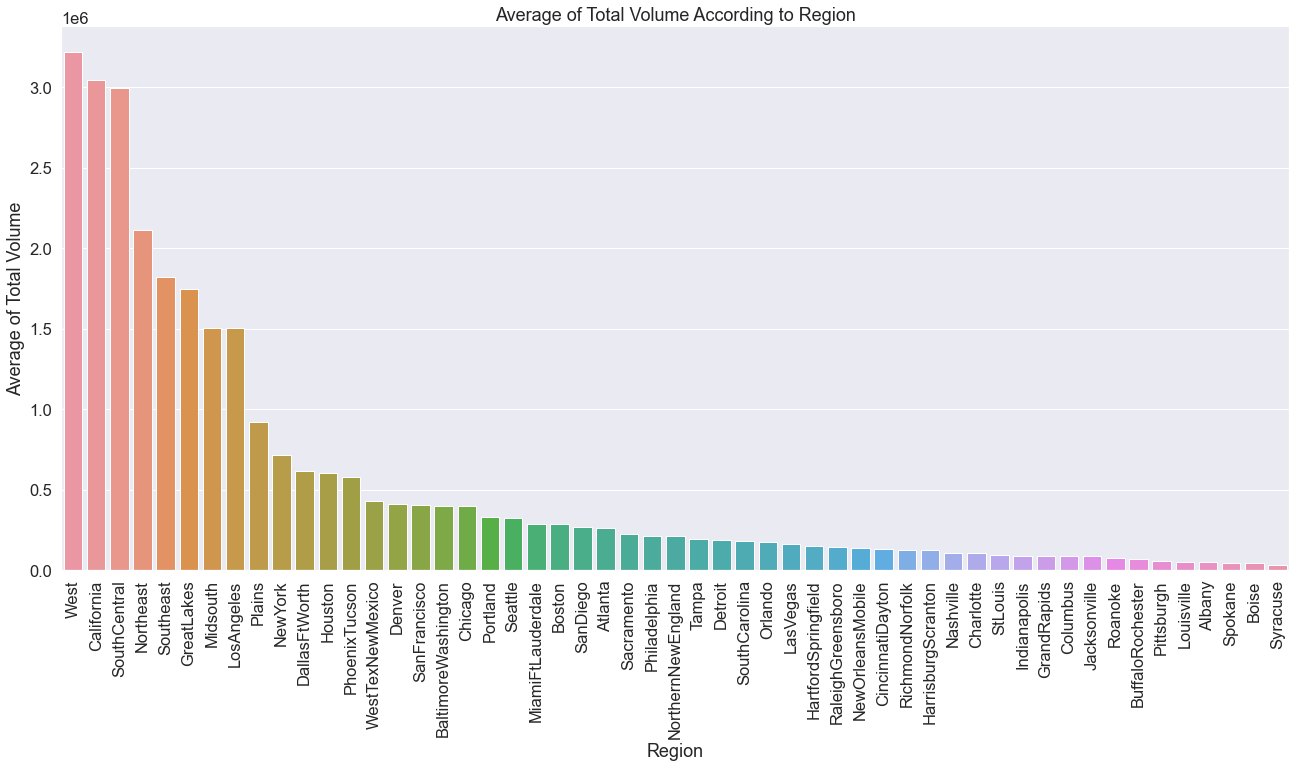

In [18]:
filter1=data.region!='TotalUS'
data1=data[filter1]

region_list=list(data1.region.unique())
average_total_volume=[]

for i in region_list:
    x=data1[data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
data2=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=data2.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=data2.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Here West, california,SouthCentral,Northeast,Greatlakes are the countries with most assumption of Avocado 

Text(0.5, 1.0, 'Average Price')

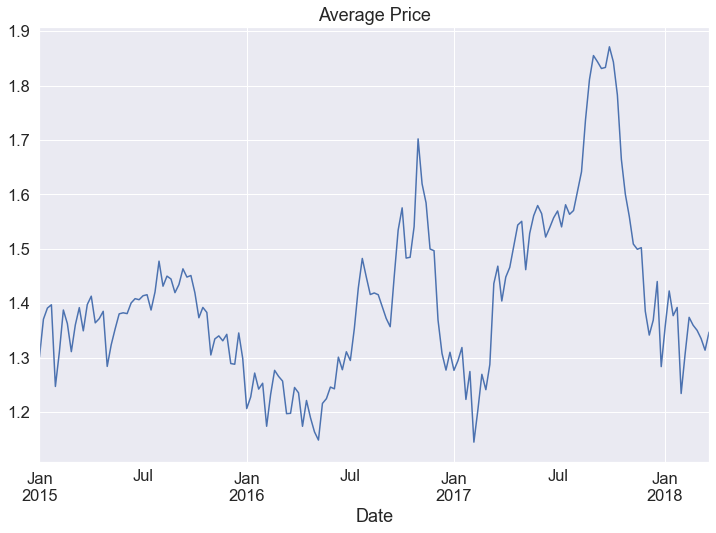

In [19]:
Dates=data.groupby('Date').mean()
plt.figure(figsize=(12,8))
Dates['AveragePrice'].plot()
plt.title('Average Price')

The Average price gets very high in between july 2018 to jan 2018.

In [20]:
# Let's check the correlation in dataset.
data.corr()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
Small,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
Large,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
XLarge,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


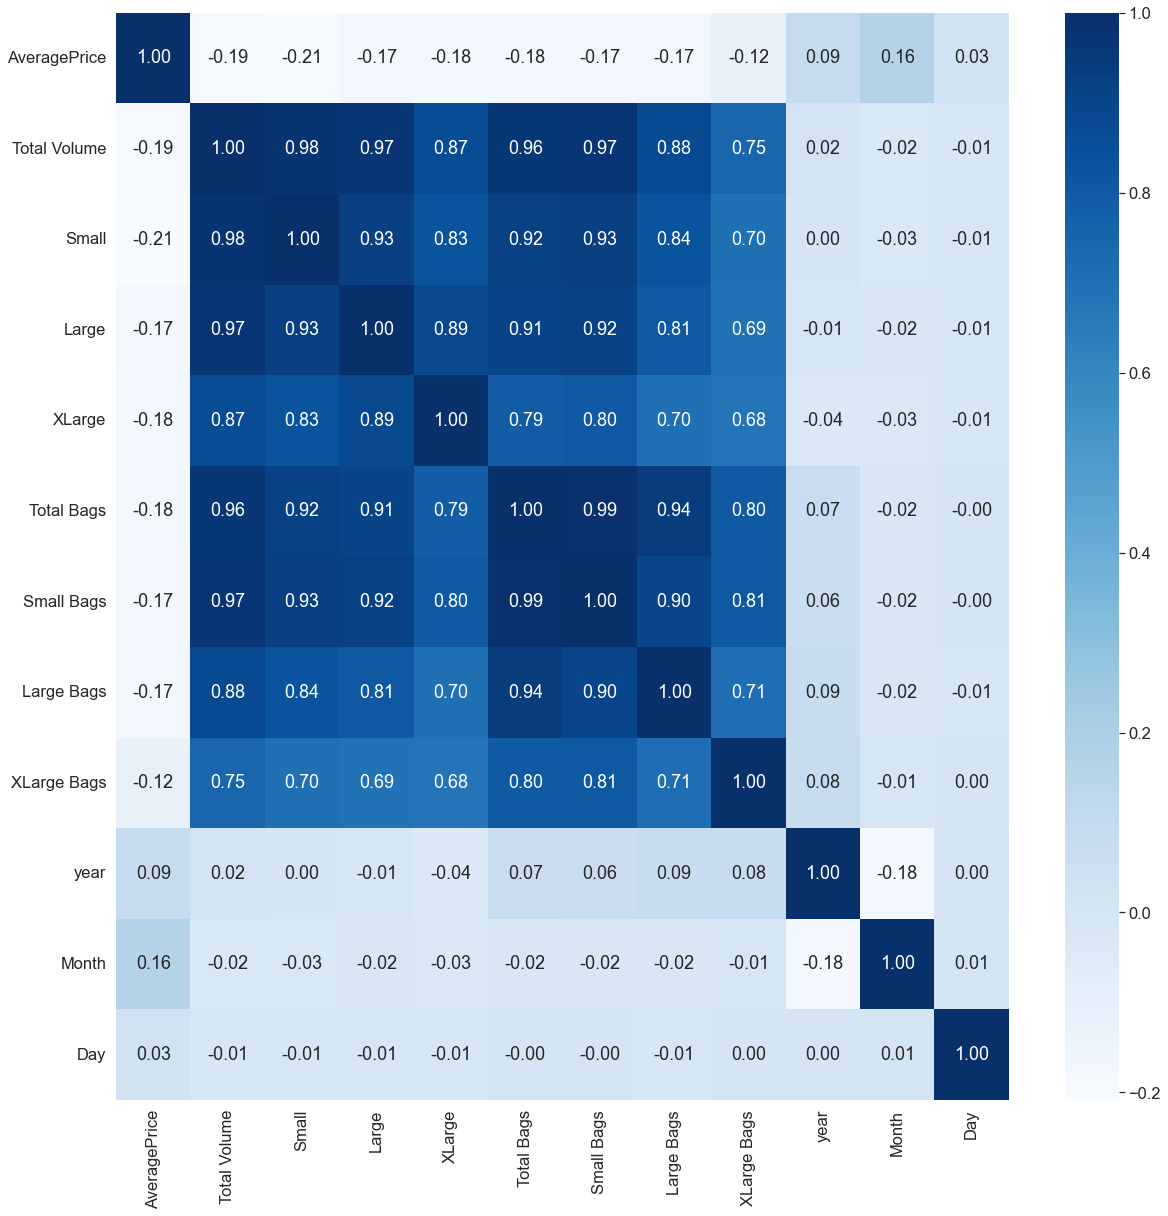

In [21]:
# Let's visualize the correlation using heatmap for better understanding.
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='0.2f')
plt.show()

Here we can see most of the features column are correlated with target column and few are not correlated. 

So let's deal with this using some features for model prediction.

In [22]:
#Let's check the unique values in the column 'region'

data['region'].nunique()

54

There are 54 unique values in the 'region'column so it's a bit tough to create dummy values for it to manage,
Let's drop this column for further procedure.

In [23]:
#Let's check the unique values in the column 'type'

data['type'].nunique()

2

Here we got only 2 unique values for column 'type',so we can easily create dummy variables for it.

In [24]:
# We will create dummy variable for column 'type' and drop the irrelevent columns.

df_new=pd.get_dummies(data.drop(['region','Date'],axis=1),drop_first=True)

In [25]:
# Checking the data after creating dummy variables and droping the irrelevent columns.
df_new.head()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


In [26]:
df_new.tail()

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,1


We successfully got the dummy variable and the columns which aren't useful were dropped.

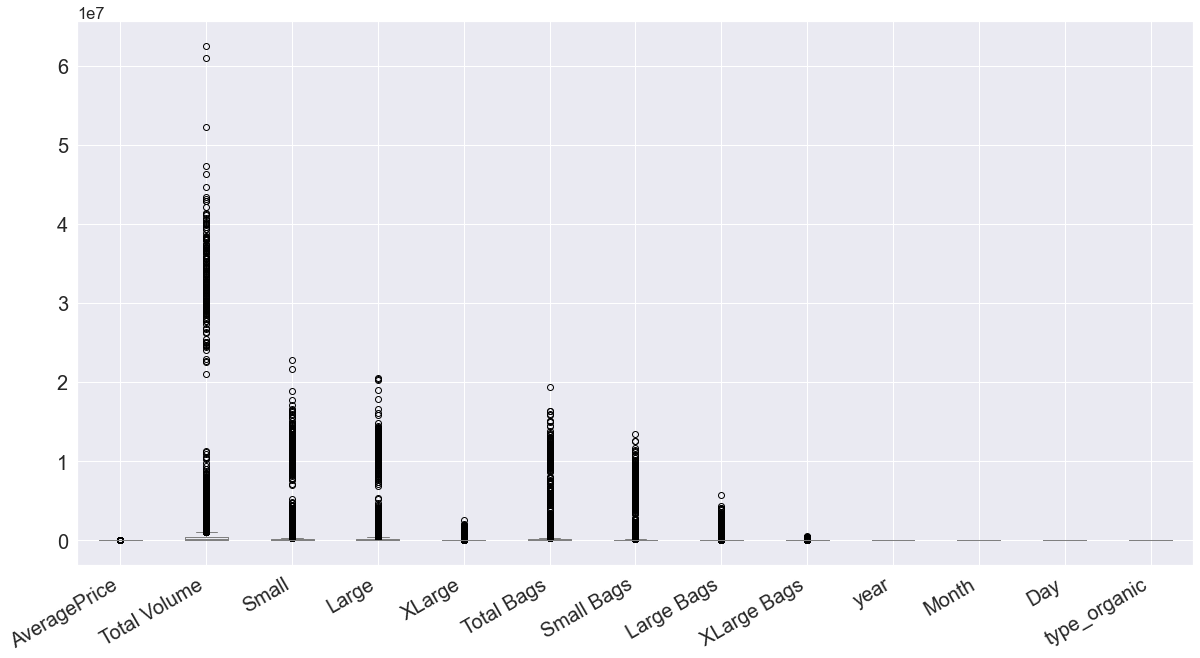

In [27]:
# Checking the outliers in the dataset.
df_new.plot(kind='box',fontsize=20,figsize=(20,10),color='grey')
plt.xticks(rotation=30,ha='right')
plt.show()

Here most of the columns contains outliers, we will handle them using zscore.

In [28]:
# Separating the features having outliers for outlier removal.

outliers=df_new[['AveragePrice','Total Volume','Small','Large','XLarge','Total Bags','XLarge Bags']]

In [29]:
# Using Zscore for outlier removal
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data_new=df_new[(z<3).all(axis=1)]
data_new

,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


We successfully removed the outliers from our dataset.

In [30]:
# Checking the dataset shape after outlier removal.
data_new.shape

(17738, 13)

In [31]:
# Checking the original dataset shape.
df_new.shape

(18249, 13)

In [32]:
# Data loss after outlier removal.
Data_loss=((18249-17738)/18249)*100
Data_loss

2.8001534330648252

There is not that much data loss after outlier removal, it is not more than 10%.

In [33]:
# Let's check the skewness in the dataset.

data_new.skew()

AveragePrice    0.380301
Total Volume    3.752986
Small           4.628222
Large           4.262080
XLarge          4.919251
Total Bags      4.521160
Small Bags      4.214066
Large Bags      7.363082
XLarge Bags     6.063918
year            0.226281
Month           0.109722
Day             0.012325
type_organic   -0.027742
dtype: float64

We can see there is skewness in some columns, we have to remove it for better model performance.

In [34]:
# Using power tranformation method for skewness removal.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [35]:
# Separating the features showing skewness and applying the power transformation to it.

data_new[['Total Volume','Small','Large','XLarge','Total Bags','Small Bags','Large Bags','XLarge',]] = scaler.fit_transform(data_new[['Total Volume','Small','Large','XLarge','Total Bags','Small Bags','Large Bags','XLarge']].values)


In [36]:
# Let's check the skewness in data after removal of skewness. 
data_new.skew()

AveragePrice    0.380301
Total Volume   -0.006275
Small          -0.037857
Large          -0.044224
XLarge          0.022830
Total Bags     -0.017871
Small Bags     -0.021279
Large Bags     -0.099351
XLarge Bags     6.063918
year            0.226281
Month           0.109722
Day             0.012325
type_organic   -0.027742
dtype: float64

We sucsessfully removed the skewness from the dataset

In [37]:
# Spliting the datset in into features and label.
x=data_new.drop('AveragePrice',axis=1)
y=data_new['AveragePrice']

In [38]:
# x represents featues.
x

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.081273,-0.660527,0.341073,-0.230768,-0.537291,-0.350584,-0.778034,0.0,2015,12,27,0
1,-0.152915,-0.779798,0.259825,-0.183627,-0.498142,-0.314792,-0.768081,0.0,2015,12,20,0
2,0.197185,-0.734570,0.636362,0.014745,-0.566000,-0.377394,-0.755412,0.0,2015,12,13,0
3,0.012950,-0.635810,0.457445,-0.129789,-0.712117,-0.512918,-0.696084,0.0,2015,12,6,0
4,-0.185860,-0.687493,0.252497,-0.119158,-0.685442,-0.492602,-0.604249,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.680885,-0.466150,-0.928695,-1.231412,-0.341590,-0.180485,-0.410742,0.0,2018,2,4,1
18245,-0.773727,-0.621305,-0.674298,-1.231412,-0.509458,-0.335264,-0.482826,0.0,2018,1,28,1
18246,-0.777665,-0.621252,-0.782120,0.435277,-0.503348,-0.317204,-0.947937,0.0,2018,1,21,1
18247,-0.704394,-0.550643,-0.719864,0.434967,-0.434613,-0.254424,-0.913144,0.0,2018,1,14,1


In [39]:
# y represents target variable.
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17738, dtype: float64

In [40]:
# Standardizing the dataset using Standard Scaler.

In [41]:
# Importing the necessary libraries.

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [42]:
# Applying standard scaler to data.

ss=StandardScaler()
x_scaled= pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [43]:
# Checking the data after standardization.

x_scaled.head()

,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,-0.081273,-0.660527,0.341073,-0.230768,-0.537291,-0.350584,-0.778034,-0.262931,-1.213431,1.645861,1.289805,-1.013966
1,-0.152915,-0.779798,0.259825,-0.183627,-0.498142,-0.314792,-0.768081,-0.262931,-1.213431,1.645861,0.492047,-1.013966
2,0.197185,-0.734570,0.636362,0.014745,-0.566000,-0.377394,-0.755412,-0.262931,-1.213431,1.645861,-0.305711,-1.013966
3,0.012950,-0.635810,0.457445,-0.129789,-0.712117,-0.512918,-0.696084,-0.262931,-1.213431,1.645861,-1.103469,-1.013966
4,-0.185860,-0.687493,0.252497,-0.119158,-0.685442,-0.492602,-0.604249,-0.262931,-1.213431,1.363390,1.517736,-1.013966


We got the standardized dataset.

In [44]:
# Checking the multicolinearity in the dataset using VIF.

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x_scaled.values, i) for i in range(x_scaled.shape[1])]
vif["Features"]=x_scaled.columns
vif

,vif_Features,Features
0,53.740277,Total Volume
1,6.998335,Small
2,11.501835,Large
3,3.950636,XLarge
4,34.865159,Total Bags
5,16.556605,Small Bags
6,3.474126,Large Bags
7,1.213593,XLarge Bags
8,1.348080,year
9,1.051354,Month


Multicollinearity only affects the predictor variables that are correlated with one another. As we are interested in a predictor variable in the model that doesn’t suffer from multicollinearity, then multicollinearity isn’t a concern for us.

In [45]:
# Checking the Best Accuracy score on random state using linear regression model.

from sklearn.linear_model import  LinearRegression
lr=LinearRegression()

In [46]:
# Applying Train Test Split on dataset for model building and evaluation.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr.fit(x_train,y_train) # Model training

y_pred=lr.predict(x_test) # Model prediction

In [47]:
y_pred

array([1.80799909, 1.41584131, 1.41305611, ..., 1.51588707, 1.17171001,
       0.90625421])

In [48]:
# Checking the mean square error,mean absolute error,root mean square error for linear regression.

from sklearn import metrics
print('Accuracy Score for Linear Regression:', lr.score(x_train,y_train)*100)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy Score for Linear Regression: 56.34449433185513
MAE: 0.20232927248233487
MSE: 0.06563510234888503
RMSE: 0.2561934861562351


In [49]:
# Checking the Best Accuracy score on random state using Desion tree regressor model.


from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train) # Model training

pred=dtr.predict(x_test) # Model prediction

In [50]:
pred

array([1.87, 1.32, 1.  , ..., 1.65, 1.19, 1.05])

In [51]:
# Checking the mean square error,mean absolute error,root mean square error for Decision tree Regressor.

print('Accuracy Score for Decision tree Regressor:', lr.score(x_train,y_train)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Accuracy Score for Decision tree Regressor: 56.34449433185513
MAE: 0.1302762119503946
MSE: 0.039118545659526494
RMSE: 0.19778408848925763


In [52]:
# Checking the Best Accuracy score on random state using RandomForest regressor model.

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)

In [53]:
# Checking the mean square error,mean absolute error,root mean square error for Random Forest Regressor.

print('Accuracy Score for Random Forest Regressor:', lr.score(x_train,y_train)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Accuracy Score for Random Forest Regressor: 56.34449433185513
MAE: 0.09706820744081171
MSE: 0.01866035723224351
RMSE: 0.13660291809563774


In [54]:
# Checking the Best Accuracy score on random state using SVR model.

from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)

In [55]:
pred_svr

array([1.44478722, 1.44081477, 1.44323281, ..., 1.44215847, 1.43858066,
       1.42917865])

In [56]:
# Checking the mean square error,mean absolute error,root mean square error for SVR.

print('Accuracy Score for SVR:', lr.score(x_train,y_train)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

Accuracy Score for SVR: 56.34449433185513
MAE: 0.29841474827290726
MSE: 0.13770338545854052
RMSE: 0.37108406791256954


In [57]:
# Model building using KNeighbors Regressor Algorithm.

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import metrics
knn=KNN()
knn.fit(x_train,y_train) # Model training
y_pred=knn.predict(x_test) # Model prediction
y_pred

array([1.87 , 1.5  , 1.516, ..., 1.786, 1.064, 1.158])

In [58]:
# Checking the mean square error,mean absolute error,root mean square error for KNN.

print('Accuracy Score for KNN:', lr.score(x_train,y_train)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_svr))
print('MSE:', metrics.mean_squared_error(y_test, pred_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

Accuracy Score for KNN: 56.34449433185513
MAE: 0.29841474827290726
MSE: 0.13770338545854052
RMSE: 0.37108406791256954


After checking each model's  mean square error,mean absolute error,root mean square error we got the least RMSE score for RandomForest Regressor model,
so it should be the best fit model but before that let's check the cross validation score for each model.


# Checking the Cross Validation Score for each model

In [59]:
from sklearn.model_selection import cross_val_score

cvs=cross_val_score(lr,x,y,cv=8)
print('Cross_validation_score for Linear Regression is:',cvs.mean())


Cross_validation_score for Linear Regression is: 0.158548680272815


In [60]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dtr,x,y,cv=8)
print('Cross_validation_score for Decision Tree Regressor is:',cvs.mean())


Cross_validation_score for Decision Tree Regressor is: -0.30066252251961534


In [61]:
cvs=cross_val_score(rf,x,y,cv=8)
print('Cross_validation_score for Random forest Regressor is:',cvs.mean())


Cross_validation_score for Random forest Regressor is: 0.31176743876882174


In [62]:
cvs=cross_val_score(svr,x,y,cv=8)
print('Cross_validation_score for SVR is:',cvs.mean())


Cross_validation_score for SVR is: -1.0574322695702887


In [63]:
cvs=cross_val_score(knn,x,y,cv=8)
print('Cross_validation_score for KNN is:',cvs.mean())


Cross_validation_score for KNN is: -0.13578302041440343


Here we got the best cross validation score for Random Forest Regressor model so it will be the best fit model and we will further proceed with it.

# Hyper Parameter tuning

In [64]:
from sklearn.linear_model import Lasso,Ridge

from sklearn.model_selection import GridSearchCV

In [65]:
# Checking the Lasso's r2_score,mse,mae,rmse. 
params={'alpha':[0.001,0.01,0.1,1.0,10],'random_state':list(range(0,100))}
lo=Lasso()
reg=GridSearchCV(lo,params)
reg.fit(x_train,y_train)
print(reg.best_params_)


{'alpha': 0.001, 'random_state': 0}


In [67]:
lo=Lasso(alpha=1,random_state=0)
lo.fit(x_train,y_train)
pred=lo.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

r2_score: 0.02429683684824302
mse: 0.14932275755426785
mae: 0.31465555239499715
rmse: 0.38642302927525923


In [68]:
# Assingning the parameters.
params = {'alpha':[0.01,0.1,1.0,10],
            'selection':['cyclic','random'],
            'max_iter':[3,5,7,9,11],
            'tol':[100,1000],
            'fit_intercept':['bool'],
            'normalize':[True,False]          
         }

In [69]:
GSV=GridSearchCV(Lasso(),params,cv=5)

In [70]:
# Training the model using GridSearchCV.
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10],
                         'fit_intercept': ['bool'],
                         'max_iter': [3, 5, 7, 9, 11],
                         'normalize': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [71]:
# Getting the best parameter.
GSV.best_params_

{'alpha': 0.01,
 'fit_intercept': 'bool',
 'max_iter': 3,
 'normalize': False,
 'selection': 'cyclic',
 'tol': 100}

In [72]:
# Finalizing the model on the basis of best parameters we got from GridSearchCV.

Finalize=Lasso(alpha=0.01, fit_intercept="bool", max_iter=11, selection="random", tol=1000)
Finalize.fit(x_train,y_train)
pred=Finalize.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 45.96835637879481
mean_squared_error: 0.08269066172385606
mean_absolute_error: 0.22542210930517162
RMSE value: 0.28755984024869685


Here we got the mean squared error of 0.0826 which is very less that means that we are very much close to best fit line. Here we got the mean absolute error of almost 2% which is very small that means there is not much difference in our true values and predicted values. Here we finally got out best fit model that is Random Forest Regressor.

# Saving the best model

In [ ]:
#Saving the model using .pkl
import joblib
joblib.dump(Finalize,"Avocado Price Prediction.pkl")